In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = './data/'

In [3]:
def load_image(image_file):
    img = cv2.imread(os.path.join(path, image_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def load_bounding_boxes(bbox_file):
    bboxes = []
    with open(os.path.join(path, bbox_file), 'r') as file:
        for line in file:
            class_id, cx, cy, w, h = map(float, line.strip().split())
            bboxes.append((cx, cy, w, h))
    return bboxes

def load_masks(mask_file):
    masks = np.load(os.path.join(path, mask_file))
    return masks['arr_0']


In [4]:
def plot_image_with_annotations(image_file, bbox_file, mask_file=None):
    img = load_image(image_file)
    bboxes = load_bounding_boxes(bbox_file)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.imshow(img)
    

    img_h, img_w, _ = img.shape
    for bbox in bboxes:
        cx, cy, w, h = bbox
        x1 = int((cx - w/2) * img_w)
        y1 = int((cy - h/2) * img_h)
        x2 = int((cx + w/2) * img_w)
        y2 = int((cy + h/2) * img_h)
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
    
    if mask_file:
        masks = load_masks(mask_file)
        for i in range(masks.shape[2]):
            mask = masks[:, :, i]
            ax.imshow(np.ma.masked_where(mask == 0, mask), alpha=1)
    
    plt.show()




CDY_2042


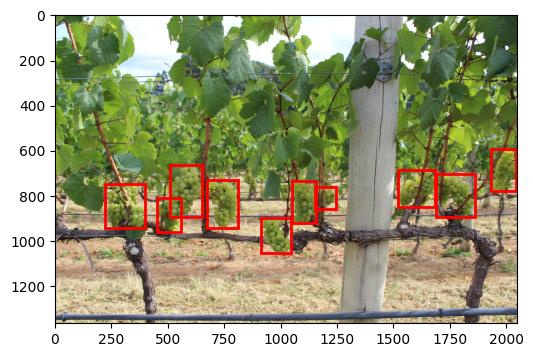

CFR_1646


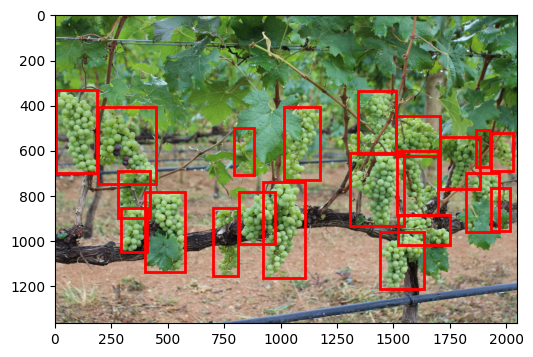

CSV_1882


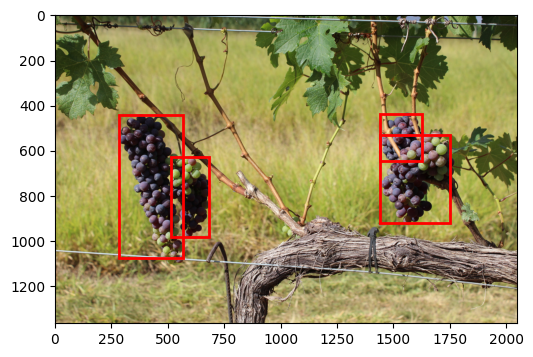

SVB_1938


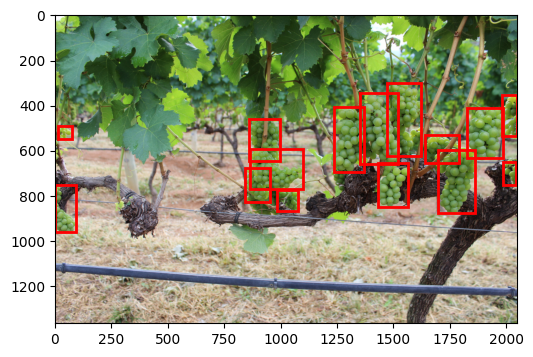

SYH_2017-04-27_1278


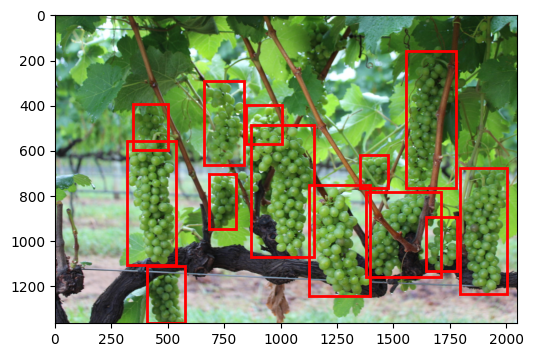

In [5]:
codes = ['CDY', 'CFR', 'CSV', 'SVB', 'SYH']

for code in codes:
    example_file = [file for file in os.listdir(path) if file.startswith(code)][0]
    name, _ = os.path.splitext(example_file)
    
    image_file = f'{name}.jpg'
    bbox_file = f'{name}.txt'
    print(name)
    plot_image_with_annotations(image_file, bbox_file)

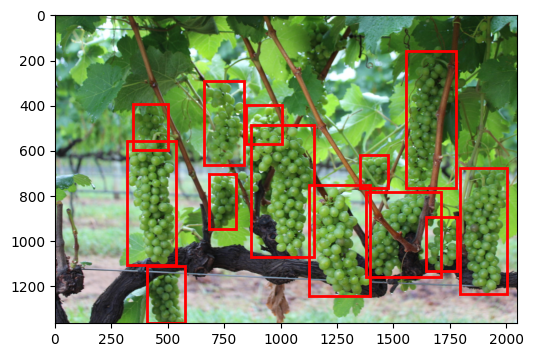

In [32]:
name = 'SYH_2017-04-27_1278'
image_file = f'{name}.jpg'
bbox_file = f'{name}.txt'
mask_file = f'{name}.npz'

plot_image_with_annotations(image_file, bbox_file)

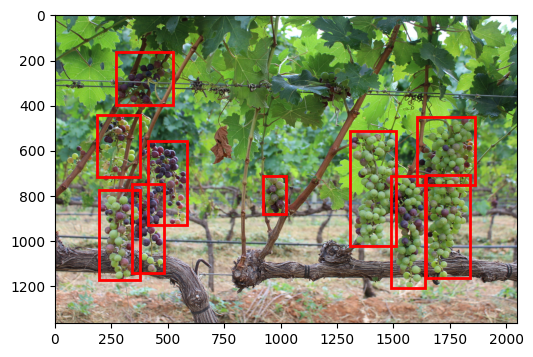

In [37]:
name = 'CSV_1889'
image_file = f'{name}.jpg'
bbox_file = f'{name}.txt'
mask_file = f'{name}.npz'

plot_image_with_annotations(image_file, bbox_file)

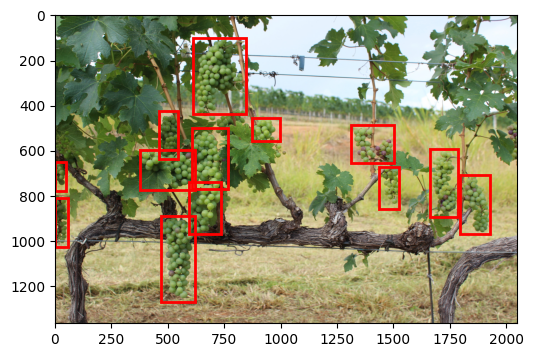

In [35]:
name = 'CSV_1887'
image_file = f'{name}.jpg'
bbox_file = f'{name}.txt'
mask_file = f'{name}.npz'

plot_image_with_annotations(image_file, bbox_file)

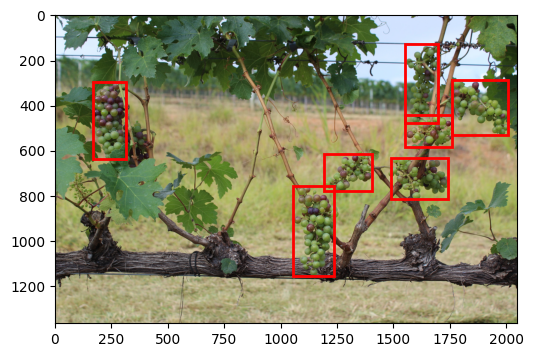

In [34]:
name = 'CSV_1886'
image_file = f'{name}.jpg'
bbox_file = f'{name}.txt'
mask_file = f'{name}.npz'

plot_image_with_annotations(image_file, bbox_file)

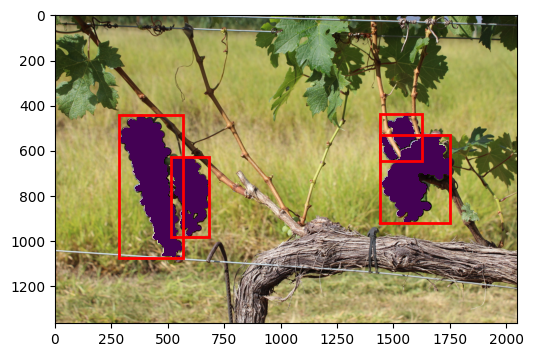

In [23]:
plot_image_with_annotations(image_file, bbox_file, mask_file)

Archivos copiados exitosamente.
